In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset='/content/drive/MyDrive/ML/Tweets.csv'
import pandas as pd
df=pd.read_csv(dataset)

In [3]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive
27480,ed167662a6,hlo all hi,hiii,positive


In [13]:
data= df[['selected_text','sentiment']]

In [ ]:
data

In [ ]:
data.isnull().sum()

In [7]:
column_name='text'
word_to_replace='notext'

data[column_name].fillna(word_to_replace,inplace=True)

<ipython-input-7-0e86ae6b774b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name].fillna(word_to_replace,inplace=True)


In [16]:
column_name='selected_text'
word_to_replace='noselectedtext'

data[column_name].fillna(word_to_replace,inplace=True)

<ipython-input-16-76c3ae22f144>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name].fillna(word_to_replace,inplace=True)


In [17]:
data.isnull().sum()

selected_text    0
sentiment        0
dtype: int64

In [ ]:
data

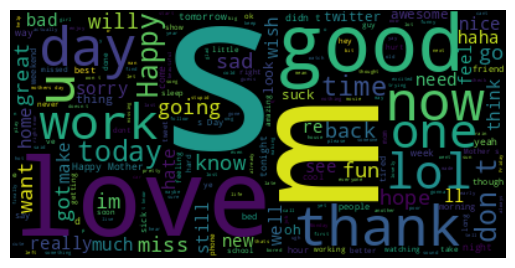

In [19]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

wordcloud=WordCloud().generate(" ".join(data['selected_text']))

plt.imshow(wordcloud,interpolation='bilinear')

plt.axis('off')

plt.show()

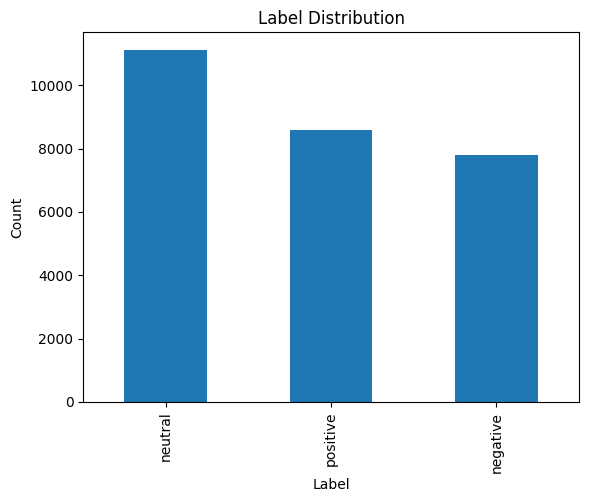

In [20]:
label_counts = df['sentiment'].value_counts()

label_counts.plot(kind='bar')




plt.xlabel('Label')

plt.ylabel('Count')

plt.title('Label Distribution')




# Display the plot

plt.show()

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df['selected_text'],df['sentiment'],test_size=0.2,random_state=42)

In [49]:
X_train.fillna('missing',inplace=True)
X_test.fillna('missing',inplace=True)


In [35]:
X_train.isnull().sum()

0

In [51]:
X_test.isnull().sum()

0

In [36]:
import nltk
nltk.download(['punkt','wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus.reader.wordnet import WordNetCorpusReader
from nltk.corpus.reader import wordnet

In [38]:
def tokenize_lemma(text):#user defined/ custom tokenizer - with lemma power - ADD POS afterwards
  tokens=nltk.word_tokenize(text)

  lemm=nltk.WordNetLemmatizer()

  clean_tokens=[]
  for tok in tokens:
     tag=nltk.pos_tag([tok])[0][1][0]
     tag_dict={
      "J":wordnet.ADJ,
      "R":wordnet.ADV,
      "N":wordnet.NOUN,
      "V":wordnet.VERB
     }
     print(tag)
     tag_dict=tag_dict.get(tag,wordnet.NOUN)
     print(lemm.lemmatize(tok,tag_dict))
     clean_tokens.append(lemm.lemmatize(tok,tag_dict))
  return clean_tokens

In [39]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [40]:
tokenize_lemma("caring")

V
care


['care']

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer(tokenizer=tokenize_lemma)

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer()

In [54]:
X_train_count= vect.fit_transform(X_train)
X_train_tfidf=tfidf.fit_transform(X_train_count)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Streaming output truncated to the last 5000 lines.
P
myself
.
.
I
in
I
that
N
case
,
,
N
forget
W
what
N
i
V
say
R
earlier
N
_sims
V
do
P
you
V
know
I
of
D
any
I
inside
N
scoop
I
on
D
a
N
station
I
that
`
`
N
s
N
anything
W
what
N
kwod
V
be
.
?
R
there
`
`
N
s
N
nothing
I
for
P
u
R
now
M
can
`
`
N
t
R
really
V
do
N
anything
I
about
I
that
,
,
R
now
M
can
N
i
.
?
N
i
V
be
R
currently
V
do
D
a
J
few
N
post
I
on
P
my
N
business
N
blog
N
http
:
:
N
//venturefile.com
N
check
P
it
I
out
I
if
P
you
I
like
P
it
V
bore
D
this
V
be
T
to
D
all
D
the
N
people
W
who
V
have
N
myspaces
:
:
N
please
V
add
.
!
.
!
.
!
N
http
:
:
N
//wwww.myspace.com/fiftyfivethreads
P
it
`
`
N
s
P
my
N
friend
`
`
N
s
N
clothing
N
line
N
im
V
watch
N
tv
I
at
N
home
V
wish
N
i
M
could
V
get
D
a
N
chicken
N
shish
V
deliver
C
but
R
not
V
go
R
enough
N
penny
N
omg
N
disco
V
be
N
packed
.
!
.
!
.
!
N
i
`
`
N
ve
N
heard
D
this
N
fall
.
.
N
i
`
`
N
m
V
wait
R
too
.
!
N
dream
V
give
N
rise
T
to
N
reality
.
.
N
life
V
be
R
not
N

In [55]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)





SVC(kernel='linear')

In [56]:
X_test_tfidf= tfidf.transform(vect.transform(X_test))
y_pred = svm.predict(X_test_tfidf)

Streaming output truncated to the last 5000 lines.
N
nd
V
be
V
look
R
forward
C
2
V
play
I
with
D
the
J
puppy
C
2
N
day
N
nd
V
see
N
lewishhh
N
microsoft
V
have
V
release
N
zune
R
also
I
in
N
europe
,
,
D
no
N
hd
I
for
P
u
J
happy
N
birthday
N
great-grandmother
N
..
N
/././
.
.
J
bad
N
news
I
on
D
a
J
good
N
day
N
command
N
e
N
isn
`
`
N
t
J
legal
N
argh
N
hey
,
,
D
no
P
we
V
be
J
second
,
,
N
kind
N
sad
,
,
C
but
P
it
`
`
N
s
N
ok
N
guitar
,
,
N
guitar
,
,
N
guitar
N
bbq
C
and
J
good
N
time
W
what
I
about
P
you
N
hurt
.
.
J
happy
V
love
P
it
.
.
J
tough
N
loss
N
sunglass
N
whore
N
boredom
V
kill
R
not
D
the
N
perfect
N
fri
N
night
N
hmm
:
...
W
what
T
to
V
make
I
for
N
dinner
N
tonight
.
?
.
?
.
?
D
no
N
clue
.
.
N
don
`
`
N
t
N
feel
I
like
N
cooking
N
anything
N
hubby
V
want
T
to
V
go
R
away
N
tonigh
R
finally
N
home
C
and
V
enjoy
D
the
N
rest
I
of
P
my
N
day
.
.
N
azongo
C
and
N
i
V
be
V
have
D
a
N
smoke-fest
.
!
N
woot
.
!
#
#
N
mmot
N
miss
P
my
N
i
M
may
V
shed
D
a
N
tear
N
thanks

In [60]:
df['selected_text'].fillna('missing',inplace=True)
df['selected_text'].isnull().sum()

0

In [61]:
df['sentiment'].fillna('missing',inplace=True)
df['sentiment'].isnull().sum()

0

In [62]:
#accuracy
svm.score(tfidf.transform(vect.transform(df['selected_text'])),df['sentiment'])

Streaming output truncated to the last 5000 lines.
N
faile
N
soooo
N
humid
I
outside
.
!
N
crazy
N
hope
N
aww
N
i
N
cant
N
lol
.
!
V
let
`
`
N
s
V
find
N
something
R
quickly
.
.
N
mine
V
have
V
be
V
bother
P
me
R
again
,
,
.
.
P
it
`
`
N
s
R
not
N
awful
,
,
C
but
R
pretty
N
icky
.
.
P
you
M
will
N
win
.
!
N
love
P
you
V
be
V
try
T
to
V
find
N
something
T
to
V
do
N
tonight
M
can
`
`
N
t
V
believe
J
nice
N
haha
:
...
P
it
D
the
N
booomb
R
just
N
woke
R
up
C
and
N
feel
R
so
N
*
N
*
N
*
N
*
N
lazy
N
time
T
to
N
work
I
out
N
damnit
.
!
N
mother
N
day
N
gift
N
i
N
love
P
me
D
some
N
jeff
N
lynne
,
,
V
excite
N
idkk
I
if
N
il
V
get
T
to
V
see
P
it
R
again
C
or
N
_ohh
N
i
N
think
C
one
I
of
P
you
M
should
V
give
D
a
N
ride
.
!
N
please
.
?
M
can
`
`
N
t
N
wait
T
to
V
see
D
the
N
smile
I
on
P
her
N
fac
N
gon
N
na
V
be
I
in
N
bed
R
soon
I
a
N
friday
`
`
N
s
I
over
R
soon
,
,
M
would
I
like
T
to
N
plug
I
in
R
just
V
finish
V
watch
P
my
N
copy
I
of
D
the
N
twilight
N
dvd
.
.
N
ganda
N
ng
N
mga
V
d

0.901790262717415

In [63]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.8486447152992541
              precision    recall  f1-score   support

    negative       0.85      0.80      0.82      1582
     neutral       0.81      0.90      0.85      2250
    positive       0.91      0.82      0.87      1665

    accuracy                           0.85      5497
   macro avg       0.86      0.84      0.85      5497
weighted avg       0.85      0.85      0.85      5497



In [64]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [65]:
import gradio as gr
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC


# # Step 2: Handle NaN values
# df['selected_text'].fillna('missing', inplace=True)
# df['sentiment'].fillna('missing',inplace=True)

# Step 3: Vectorize the text data
# vect = TfidfVectorizer()
# X = vect.fit_transform(df['selected_text'])
# y = df['sentiment']

# # Step 4: Train the SVM model
# svm = SVC(kernel='linear')
# svm.fit(X, y)

# Step 5: Define the prediction function
def predict_sentiment(text):
    text_vectorized = vect.transform([text])
    sentiment = svm.predict(tfidf.transform(text_vectorized)[0])
    return sentiment

# Step 6: Create the Gradio interface
iface = gr.Interface(
    fn=predict_sentiment,
    inputs="text",
    outputs="text",
    title="Sentiment Analysis",
    description="Enter a text and predict its sentiment (neutral, positive, or negative)."
)

# Step 7: Launch the interface
iface.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>